<a href="https://colab.research.google.com/github/joaomorangoni/Python/blob/main/2_ExemploAnalisedasInscricoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Simples - Inscrições do Curso

### Após a Aula introdutória vamos ver como colher algumas informações Simples Usando Python

In [ ]:
import pandas as pd #Biblioteca responsável para fazer a leitura e impressão de bases de dados

### Veja neste link como armazenar uma planilha excel no Github para usar como base de dados no COLAB

In [ ]:
url = 'https://github.com/profcintiapinho/laboratorio_ia/blob/main/respostasalunos.xlsx?raw=true' #pega o caminho do arquivo excel no github
planilha = "respostas" #identifica a planilha que está os dados
base = pd.read_excel(url,planilha) #pega o caminho e a planilha exata e armazena na variável

In [ ]:
base

,Turma,interesse,computador,motivacao
0,Novo Tec - Administração(Tarde),Noite,Sim,Quero estar mais liga e aprender muito mais s...
1,Contabilidade - Noite,Tarde,Sim,conseguir automatizar alguns processos no meu ...
2,Contabilidade - Noite,Tarde,Sim,"Obter um pouco de conhecimento nessa área, a q..."
3,Novo Tec - Recursos Humanos (Manhã),Noite,Sim,Porque o python é uma linguagens de programaçã...
4,Contabilidade - Noite,Tarde,Sim,quero aprimorar meus conhecimentos
...,...,...,...,...
56,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
57,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
58,Novo Tec - Informática (Manhã),Tarde,Sim,Busca por conhecimentos que possam agregar na ...
59,Novo Tec - Informática (Manhã),Noite,Sim,Ampliar meus conhecimentos na área de informática


In [ ]:
import matplotlib.pyplot as plt #biblioteca para gerar gráficos
import seaborn as sns #biblioteca para visualizar gráficos

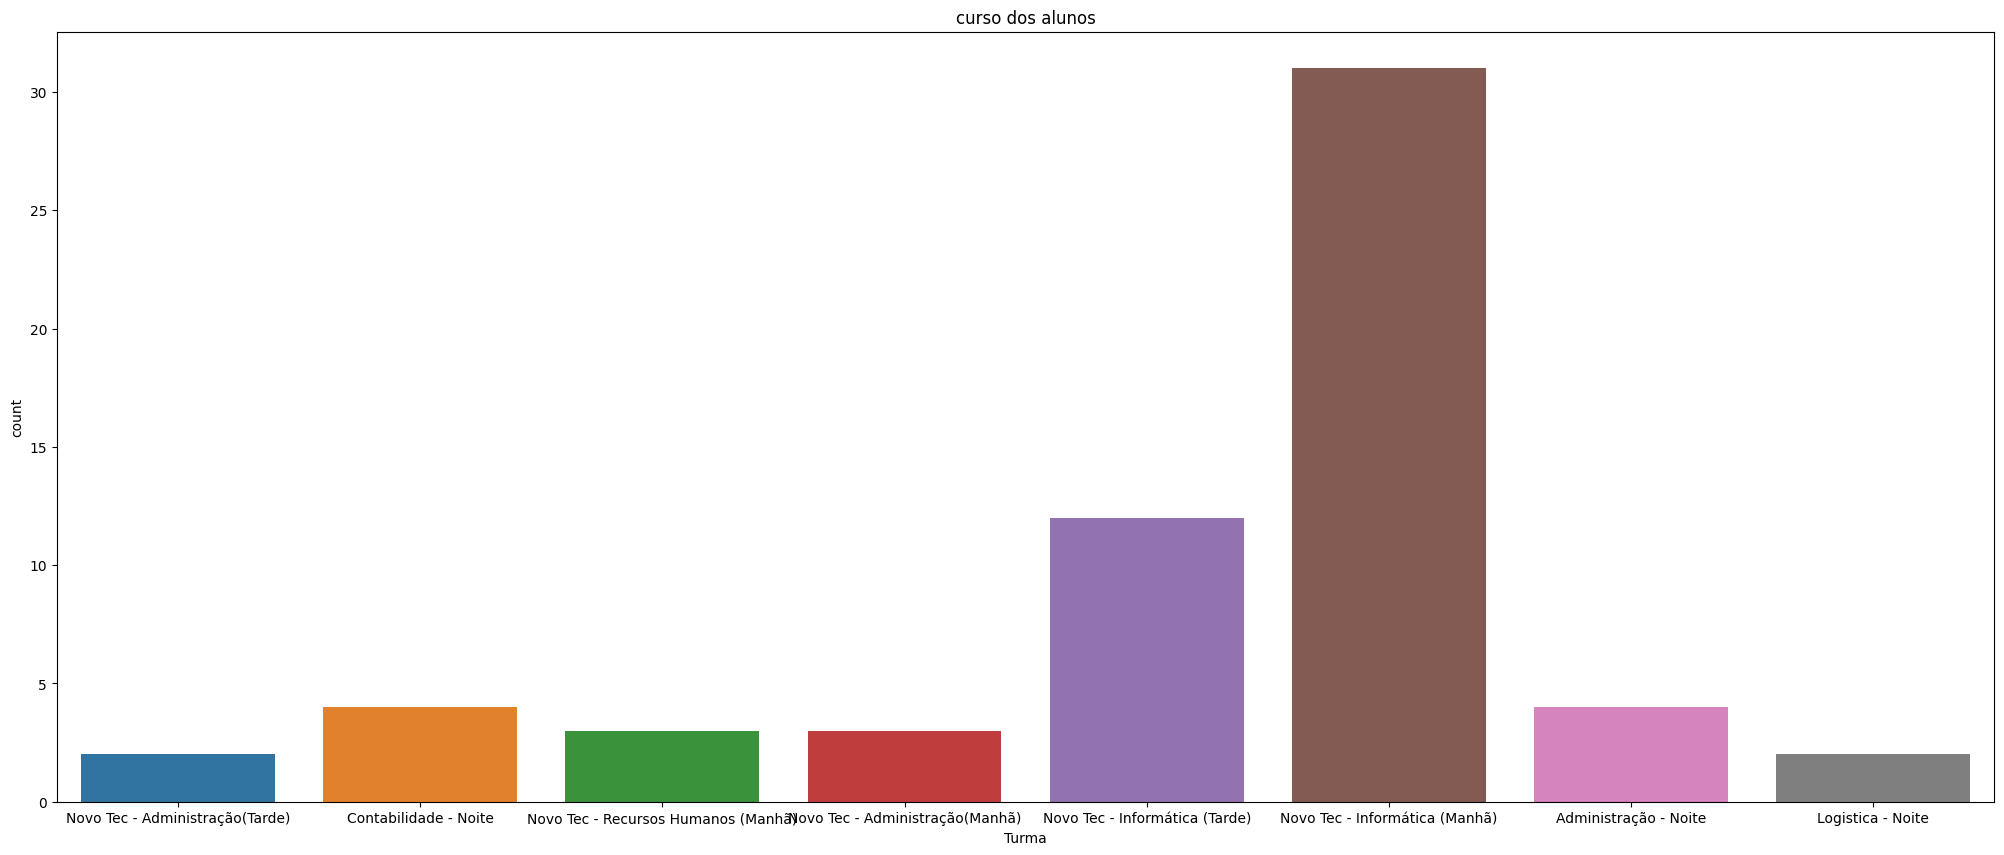

In [ ]:
plt.subplots(figsize=(25, 10))
plt.title("curso dos alunos")
sns.countplot(x = base.Turma);

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(base['computador'], color='#00BFFF');
plt.title('Alunos possuem computadores?')

In [ ]:
base['computador'].value_counts()

Sim    59
não     2
Name: computador, dtype: int64

In [ ]:
tarde = base.interesse.value_counts()['Tarde']
noite = base.interesse.value_counts()['Noite']

In [ ]:
x = ["Tarde", "Noite"]
y = [tarde, noite]

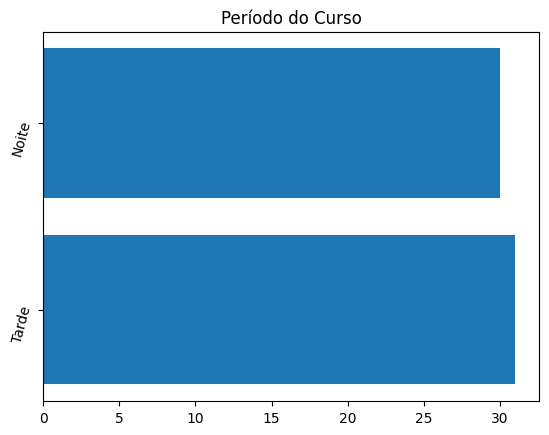

In [ ]:
plt.barh(x, y)
plt.yticks(rotation=75)
plt.title('Período do Curso')
plt.show()

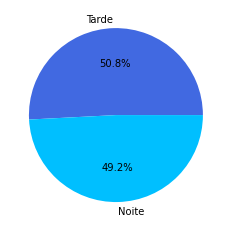

In [ ]:
cores = ['#4169E1','#00BFFF','#00008B']
plt.pie(y, labels=x, autopct='%1.1f%%', colors = cores)
plt.show()

In [ ]:
import spacy
import re

In [ ]:
!python -m spacy download pt_core_news_sm

2023-09-01 11:00:19.462907: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 50.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
pln = spacy.load('pt_core_news_sm')

In [ ]:
stop_words

{'a',
 'acerca',
 'ademais',
 'adeus',
 'agora',
 'ainda',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'antes',
 'ao',
 'aos',
 'apenas',
 'apoia',
 'apoio',
 'apontar',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'bom',
 'breve',
 'cada',
 'caminho',
 'catorze',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido',
 'conhecida',
 'conhecido',
 'conselho',
 'contra',
 'contudo',
 'corrente',
 'cuja',
 'cujo',
 'custa',
 'cá',
 'da',
 'daquela',
 'daquele',
 'dar',
 'das',
 'de',
 'debaixo',
 'demais',
 'dentro',
 'depois',
 'des',
 'desde',
 'dessa',
 'desse',
 'desta',
 'deste',
 'deve',
 'devem',
 'deverá',
 'dez',
 'dezanove',
 'dezasseis',
 'dezassete',
 'dezoito',
 'diante',
 'direita',
 'disso',
 'diz',
 'dizem',
 'dizer',
 'do',
 'dois',
 'dos',
 'doze',
 'duas',
 'dá

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [ ]:
#Conta a quantidade de palavras
len(stop_words)

416

In [ ]:
import string
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(text):
    result = []
    pos_tag = ['ADJ', 'NOUN', 'VERB', 'PROPN'] # escolhendo apenas adjetivos, substantivos e verbos , 'VERB'
    texto = re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '', text )
    doc = pln(texto.lower()) # Transformando em minúsculo
    for token in doc:
        # 3
        if(token.text in stop_words or token.text in pontuacoes):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)

        texto = ' '.join([str(elemento) for elemento in result if not elemento.isdigit()])


    #return result # 5
    return texto # 5

In [ ]:
base.motivacao=base.motivacao.astype(str)
base['limpa'] = base['motivacao'].apply(preprocessamento)

NameError: ignored

In [ ]:
motivo = base['limpa'].values
juntandotudo = ''
for sentimento in motivo:
  juntandotudo += sentimento+" "

NameError: ignored

In [ ]:
base

NameError: ignored

In [ ]:
juntandotudo = stop_words

In [ ]:
miranha= '''O Homem-Aranha (Spider-Man), alter ego Peter Parker, um super-herói aparece revistas quadrinhos publicadas pela Marvel Comics. Criado pelo escritor/editor Stan Lee e pelo escritor/artista Steve Ditko, o Homem-Aranha apareceu pela primeira vez na Amazing Fantasy #15 (01 de Agosto de 1962), durante a Era de Prata dos Quadrinhos. Lee e Ditko conceberam o personagem como um órfão que foi educado criado pela sua tia (May Parker)  tio (Ben Parker) em Nova Iorque , enquanto adolescente, tem  lidar lutas diárias normais sua idade, em adição às lutas que tem como combatente do crime. Para combater seus inimigos, os criadores deram-lhe superforça e superagilidade, a capacidade de aderir na maioria superfícies, a habilidade disparar teias de aranha através mecanismos montados nos pulsos (inventados por ele próprio e batizados  "lança-teia" — web-shooters)  reação precognitiva ao perigo chamada "sentido-aranha" (spider-sense). Peter Parker adquiriu seus poderes após sido picado  aranha radioativa.
O Homem-Aranha dos heróis mais populares todo o mundo. Criado para os quadrinhos, foi adaptado para várias mídias  fácil identificação para praticamente qualquer leitor.

Isso porque, além ter responsabilidades de herói, precisa lidar com suas preocupações rotineiras, como arrumar emprego, ligar com namoradas pagar contas.

O personagem surgiu em 1962, na revista Amazing Fantasy, da Marvel, foi criado por um esforço coletivo entre Stan Lee, Jack Kirby e Steve Dikto. Entretanto, Kirby participou somente desenvolvimento inicial do Aranha,  desenhista regular. histórias ficavam  cargo Lee Ditko.
A princípio, o Homem-Aranha foi inspirado em histórias personagem The Spider, protagonista de histórias pulps.  suas primeiras histórias, ele já chamava atenção por ser um adolescente comum, encaixar arquétipo dos heróis musculosos.

Antes ser Homem-Aranha, herói apenas Peter Parker. Ainda bebê, ficou órfão depois seus pais (agentes da CIA) foram executados. Dessa maneira, Peter acabou indo morar com seus tios Ben  May Parker.

'''

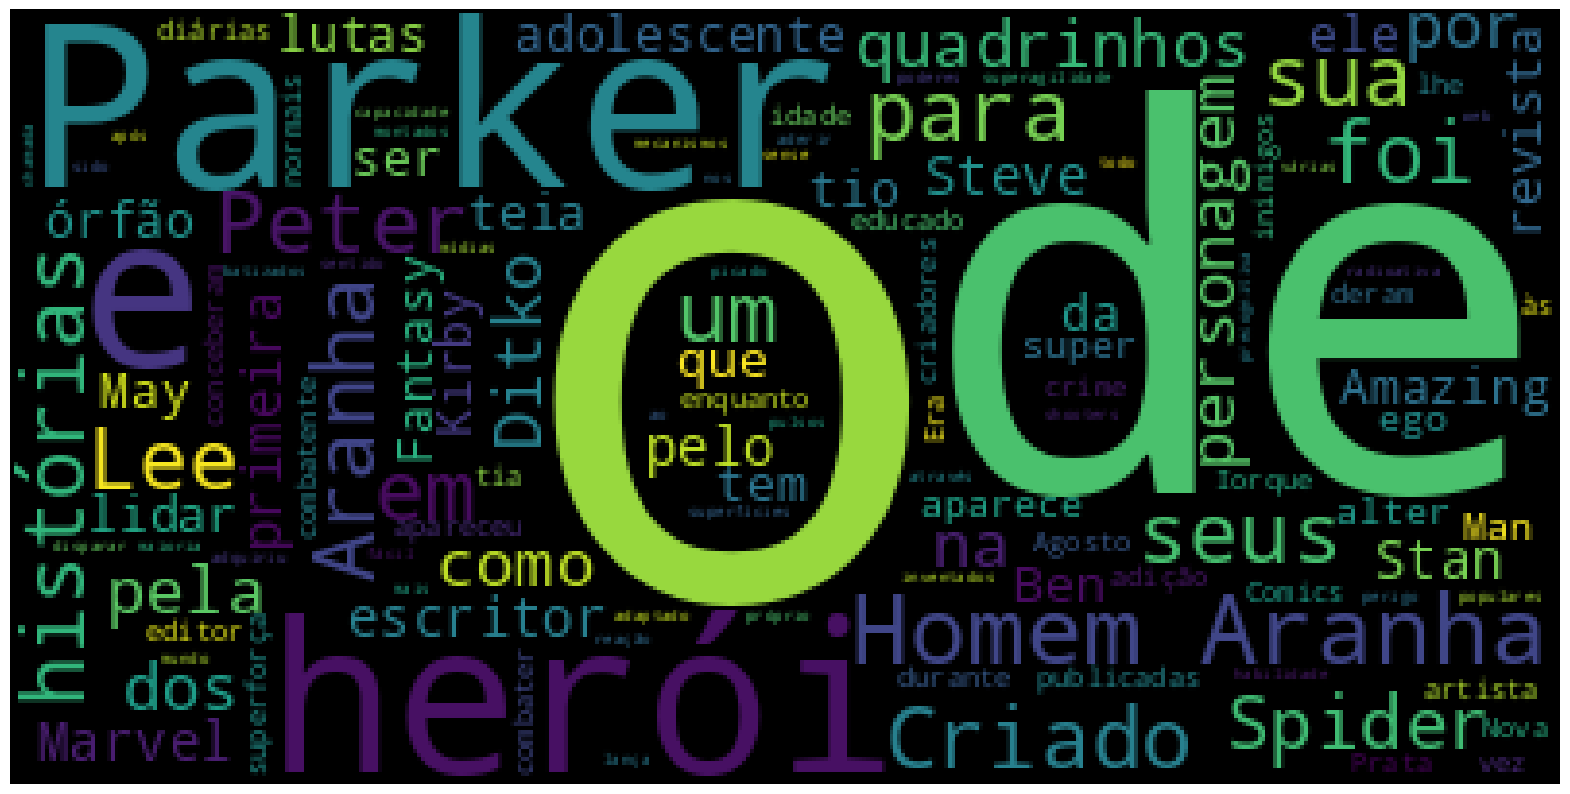

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(miranha))